# <span style="font-family:Bebas Neue; font-size:1em;">Proyecto Semestral - IEE2103</span>

A partir del desarrollo en Wolfram Mathematica, se obtuvo que $s(x) = \ \uparrow \uparrow _{c} \ast \ a \cdot \wedge \left( \frac{1 - \frac{L}{2}}{\frac{L}{2}} \right)$ 

De esta manera, $s(x, t) = \ \frac{a}{2} \cdot \left( \wedge \left( \frac{1 - \frac{L}{2} - ct}{\frac{L}{2}} \right) + \wedge \left( \frac{1 - \frac{L}{2} + ct}{\frac{L}{2}} \right) \right)$ 

In [1]:
# Librerías
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from random import random
import sounddevice as sd

In [6]:
def triangulo(x):
    return 2 * abs((x / 2) % 2 - 1) - 1

def s(
    x,  
    t,
    a = 1,                      # amplitud
    L = 0.7,                    # largo de cuerda estándar
    c = 1.8012 * (10 ** -4),    # velocidad
    u = 3.09 * (10 ** -4),      # densidad de la cuerda
    T = 56.4                    # tensión
    ):
    
    c = math.sqrt(T / u)
    
    return (a / 2) * (triangulo((x - L / 2 - c * t) / (L / 2)) + triangulo((x - L / 2 + c * t) / (L / 2)))

In [ ]:
'''
fig, ax = plt.subplots()

L = 0.648
t = np.arange(0.0, 5, 0.001)
s = s(L, t)
l = plt.plot(t, s)

ax = plt.axis([0, L, -1, 1])

redDot, = plt.plot([L / 2], [s(L / 2, 0)], 'ro')

def animate(i):
    redDot.set_data(i, s(L, i))
    return redDot,

myAnimation = FuncAnimation(fig, animate, frames=np.arange(0.0, 5, 0.1), \
                                      interval=10, blit=True, repeat=True)

plt.show()
'''

'''
L = 0.648                       #largo de una cuerda estandar 

#--------------------------------------------------------------------------------------------------------------------------------


list_x = np.linspace(0, 1000)
fig, ax = plt.subplots()
ax.set_ylim(-1, 1)
def animate(i):
    y = list(map(lambda x:s(x, i, L = 0.648), list_x))
    ax.plot(list_x,y,color = "green")

ani = FuncAnimation(fig, animate, frames = np.arange(0.0, 5.0, 0.2), interval = 10, repeat = True)
plt.show()
'''

In [38]:
def s(
    x,  
    t,
    a = 1,                      # amplitud
    L = 0.7,                    # largo de cuerda estándar    
    u = 3.09 * (10 ** -4),      # densidad de la cuerda
    T = 56.4                    # tensión
    ):
    
    c = math.sqrt(T / u)
    
    return (a / 2) * (triangulo((x - L / 2 - c * t) / (L / 2)) + triangulo((x - L / 2 + c * t) / (L / 2)))

fm = 44100

muestra = np.linspace(0, 5, 5 * fm)
sonido = s(0.35, muestra, a = 0.02)

In [39]:
def envolvente(x, t):
    
    guitarra = []
    num = 0
    aux = {
        0: 0,
        1: 0.064,
        2: 0.154,
        3: 0.604,
        4: 1
        }

    for i in x:
        
        num += 1 / (fm * t)

        if num >= aux[0] and num < aux[1]:
            guitarra.append((i / 0.08) * num)
        
        elif num >= aux[1] and num < aux[2]:
            guitarra.append(i * (1 - (1 / 0.185) * (num - 0.024)))
        
        elif num >= aux[2] and num < aux[3]:
            guitarra.append(0.3 * i)
        
        elif num >= aux[3] and num < aux[4]:
            guitarra.append(i * (0.3 - (1 / 1.3)) * (num - 0.604))
        
        else:
            guitarra.append(0)
    
    return guitarra

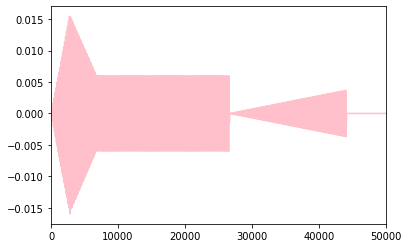

In [43]:
fig, ax = plt.subplots()
ax.set_xlim(0,50000)
plt.plot(envolvente(sonido,1),color = "pink")
a = sd.play(envolvente(sonido, 1), fm)